# Density and Contour Plots

Sometimes it is useful to display three-dimensional data in two dimensions using contours or color-coded regions.
There are three Matplotlib functions that can be helpful for this task: `plt.contour` for contour plots, `plt.contourf` for filled contour plots, and `plt.imshow` for showing images.
This chapter looks at several examples of using these. We'll start by setting up the notebook for plotting and importing the functions we will use:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

## Visualizing a Three-Dimensional Function

Our first example demonstrates a contour plot using a function $z = f(x, y)$, using the following particular choice for $f$ (we've seen this before in [Computation on Arrays: Broadcasting](02.05-Computation-on-arrays-broadcasting.ipynb), when we used it as a motivating example for array broadcasting):

In [ ]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

A contour plot can be created with the `plt.contour` function.
It takes three arguments: a grid of *x* values, a grid of *y* values, and a grid of *z* values.
The *x* and *y* values represent positions on the plot, and the *z* values will be represented by the contour levels.
Perhaps the most straightforward way to prepare such data is to use the `np.meshgrid` function, which builds two-dimensional grids from one-dimensional arrays:

In [ ]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

Now let's look at this with a standard line-only contour plot (see the following figure):

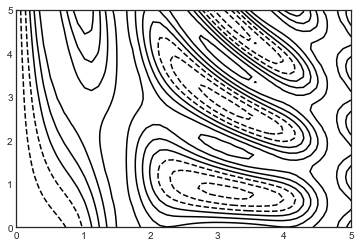

In [ ]:
plt.contour(X, Y, Z, colors='black');

Notice that when a single color is used, negative values are represented by dashed lines and positive values by solid lines.
Alternatively, the lines can be color-coded by specifying a colormap with the `cmap` argument.
Here we'll also specify that we want more lines to be drawn, at 20 equally spaced intervals within the data range, as shown in the following figure:

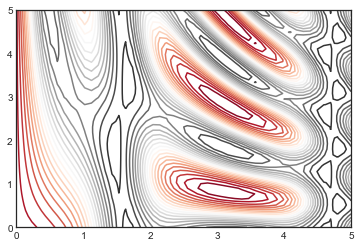

In [ ]:
plt.contour(X, Y, Z, 20, cmap='RdGy');

Here we chose the `RdGy` (short for *Red–Gray*) colormap, which is a good choice for divergent data: (i.e., data with positive and negative variation around zero).
Matplotlib has a wide range of colormaps available, which you can easily browse in IPython by doing a tab completion on the `plt.cm` module:
```
plt.cm.<TAB>
```

Our plot is looking nicer, but the spaces between the lines may be a bit distracting.
We can change this by switching to a filled contour plot using the `plt.contourf` function, which uses largely the same syntax as `plt.contour`.

Additionally, we'll add a `plt.colorbar` command, which creates an additional axis with labeled color information for the plot (see the following figure):

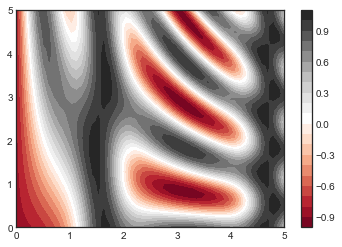

In [ ]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

The colorbar makes it clear that the black regions are "peaks," while the red regions are "valleys."

One potential issue with this plot is that it is a bit splotchy: the color steps are discrete rather than continuous, which is not always what is desired.
This could be remedied by setting the number of contours to a very high number, but this results in a rather inefficient plot: Matplotlib must render a new polygon for each step in the level.
A better way to generate a smooth representation is to use the `plt.imshow` function, which offers the `interpolation` argument to generate a smooth two-dimensional representation of the data (see the following figure):

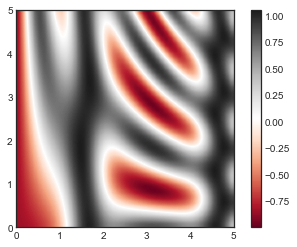

In [ ]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy',
           interpolation='gaussian', aspect='equal')
plt.colorbar();

There are a few potential gotchas with `plt.imshow`, however:

- It doesn't accept an *x* and *y* grid, so you must manually specify the *extent* [*xmin*, *xmax*, *ymin*, *ymax*] of the image on the plot.
- By default it follows the standard image array definition where the origin is in the upper left, not in the lower left as in most contour plots. This must be changed when showing gridded data.
- It will automatically adjust the axis aspect ratio to match the input data; this can be changed with the `aspect` argument.

Finally, it can sometimes be useful to combine contour plots and image plots.
For example, here we'll use a partially transparent background image (with transparency set via the `alpha` parameter) and overplot contours with labels on the contours themselves, using the `plt.clabel` function (see the following figure):

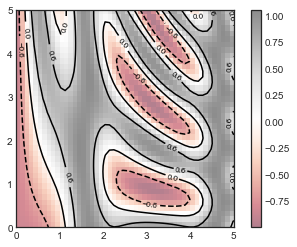

In [ ]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();

The combination of these three functions—`plt.contour`, `plt.contourf`, and `plt.imshow`—gives nearly limitless possibilities for displaying this sort of three-dimensional data within a two-dimensional plot.
For more information on the options available in these functions, refer to their docstrings.
If you are interested in three-dimensional visualizations of this type of data, see [Three-dimensional Plotting in Matplotlib](04.12-Three-Dimensional-Plotting.ipynb).

# Histograms, Binnings, and Density

A simple histogram can be a great first step in understanding a dataset.
Earlier, we saw a preview of Matplotlib's histogram function (discussed in [Comparisons, Masks, and Boolean Logic](02.06-Boolean-Arrays-and-Masks.ipynb)), which creates a basic histogram in one line, once the normal boilerplate imports are done (see the following figure):

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

rng = np.random.default_rng(1701)
data = rng.normal(size=1000)

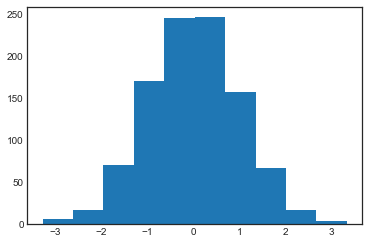

In [ ]:
plt.hist(data);

The `hist` function has many options to tune both the calculation and the display;
here's an example of a more customized histogram, shown in the following figure:

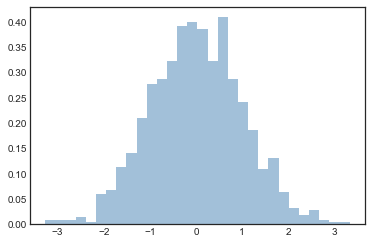

In [ ]:
plt.hist(data, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

The `plt.hist` docstring has more information on other available customization options.
I find this combination of `histtype='stepfilled'` along with some transparency `alpha` to be helpful when comparing histograms of several distributions (see the following figure):

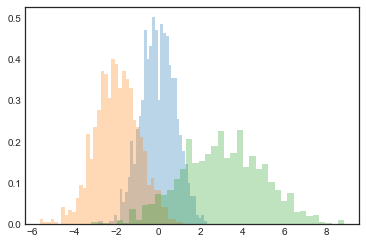

In [ ]:
x1 = rng.normal(0, 0.8, 1000)
x2 = rng.normal(-2, 1, 1000)
x3 = rng.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

If you are interested in computing, but not displaying, the histogram (that is, counting the number of points in a given bin), you can use the `np.histogram` function:

In [ ]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 23 241 491 224  21]


## Two-Dimensional Histograms and Binnings

Just as we create histograms in one dimension by dividing the number line into bins, we can also create histograms in two dimensions by dividing points among two-dimensional bins.
We'll take a brief look at several ways to do this here.
We'll start by defining some data—an `x` and `y` array drawn from a multivariate Gaussian distribution:

In [ ]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = rng.multivariate_normal(mean, cov, 10000).T

### plt.hist2d: Two-dimensional histogram

One straightforward way to plot a two-dimensional histogram is to use Matplotlib's `plt.hist2d` function (see the following figure):

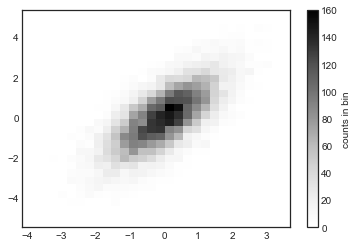

In [ ]:
plt.hist2d(x, y, bins=30)
cb = plt.colorbar()
cb.set_label('counts in bin')

Just like `plt.hist`, `plt.hist2d` has a number of extra options to fine-tune the plot and the binning, which are nicely outlined in the function docstring.
Further, just as `plt.hist` has a counterpart in `np.histogram`, `plt.hist2d` has a counterpart in `np.histogram2d`:

In [ ]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)
print(counts.shape)

(30, 30)


For the generalization of this histogram binning when there are more than two dimensions, see the `np.histogramdd` function.

### plt.hexbin: Hexagonal binnings

The two-dimensional histogram creates a tesselation of squares across the axes.
Another natural shape for such a tesselation is the regular hexagon.
For this purpose, Matplotlib provides the `plt.hexbin` routine, which represents a two-dimensional dataset binned within a grid of hexagons (see the following figure):

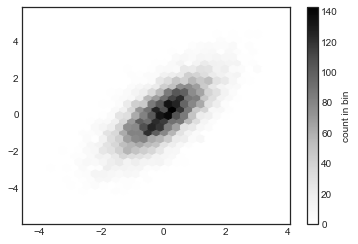

In [ ]:
plt.hexbin(x, y, gridsize=30)
cb = plt.colorbar(label='count in bin')

`plt.hexbin` has a number of additional options, including the ability to specify weights for each point and to change the output in each bin to any NumPy aggregate (mean of weights, standard deviation of weights, etc.).

### Kernel density estimation

Another common method for estimating and representing densities in multiple dimensions is *kernel density estimation* (KDE).
This will be discussed more fully in [In-Depth: Kernel Density Estimation](05.13-Kernel-Density-Estimation.ipynb), but for now I'll simply mention that KDE can be thought of as a way to "smear out" the points in space and add up the result to obtain a smooth function.
One extremely quick and simple KDE implementation exists in the `scipy.stats` package.
Here is a quick example of using KDE (see the following figure):

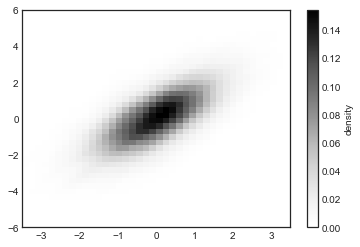

In [ ]:
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6])
cb = plt.colorbar()
cb.set_label("density")

KDE has a smoothing length that effectively slides the knob between detail and smoothness (one example of the ubiquitous bias–variance trade-off).
The literature on choosing an appropriate smoothing length is vast; `gaussian_kde` uses a rule of thumb to attempt to find a nearly optimal smoothing length for the input data.

Other KDE implementations are available within the SciPy ecosystem, each with its own strengths and weaknesses; see, for example, `sklearn.neighbors.KernelDensity` and `statsmodels.nonparametric.KDEMultivariate`.
For visualizations based on KDE, using Matplotlib tends to be overly verbose.
The Seaborn library, discussed in [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb), provides a much more compact API for creating KDE-based visualizations.

# Customizing Plot Legends

Plot legends give meaning to a visualization, assigning meaning to the various plot elements.
We previously saw how to create a simple legend; here we'll take a look at customizing the placement and aesthetics of the legend in Matplotlib.

The simplest legend can be created with the `plt.legend` command, which automatically creates a legend for any labeled plot elements (see the following figure):

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [ ]:
%matplotlib inline
import numpy as np

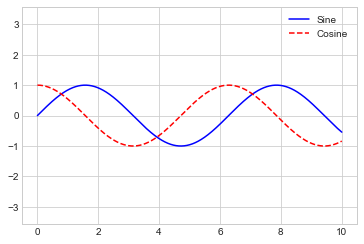

In [ ]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend()

But there are many ways we might want to customize such a legend.
For example, we can specify the location and turn on the frame (see the following figure):

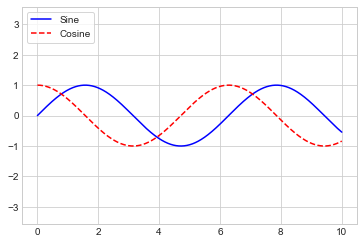

In [ ]:
ax.legend(loc='upper left', frameon=True)
fig

We can use the ``ncol`` command to specify the number of columns in the legend, as shown in the following figure:

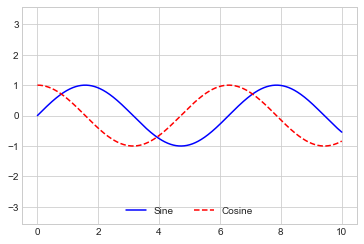

In [ ]:
ax.legend(loc='lower center', ncol=2)
fig

And we can use a rounded box (`fancybox`) or add a shadow, change the transparency (alpha value) of the frame, or change the padding around the text (see the following figure):

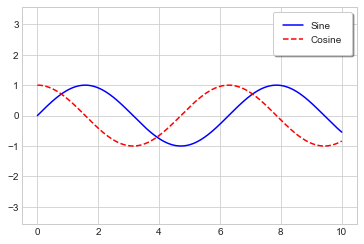

In [ ]:
ax.legend(frameon=True, fancybox=True, framealpha=1,
          shadow=True, borderpad=1)
fig

For more information on available legend options, see the `plt.legend` docstring.

## Choosing Elements for the Legend

As we have already seen, by default the legend includes all labeled elements from the plot.
If this is not what is desired, we can fine-tune which elements and labels appear in the legend by using the objects returned by `plot` commands.
`plt.plot` is able to create multiple lines at once, and returns a list of created line instances.
Passing any of these to `plt.legend` will tell it which to identify, along with the labels we'd like to specify (see the following figure):

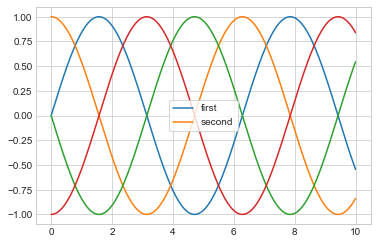

In [ ]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second'], frameon=True);

I generally find in practice that it is clearer to use the first method, applying labels to the plot elements you'd like to show on the legend (see the following figure):

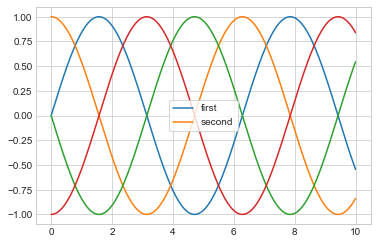

In [ ]:
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(frameon=True);

Notice that the legend ignores all elements without a `label` attribute set.

## Legend for Size of Points

Sometimes the legend defaults are not sufficient for the given visualization.
For example, perhaps you're using the size of points to mark certain features of the data, and want to create a legend reflecting this.
Here is an example where we'll use the size of points to indicate populations of California cities.
We'd like a legend that specifies the scale of the sizes of the points, and we'll accomplish this by plotting some labeled data with no entries (see the following figure):

In [ ]:
# Uncomment to download the data
# url = ('https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/'
#        'master/notebooks/data/california_cities.csv')
# !cd data && curl -O {url}

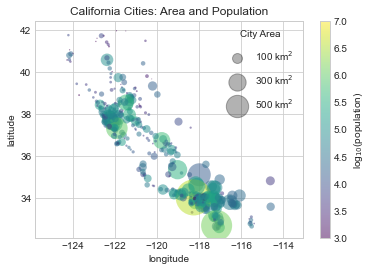

In [ ]:
import pandas as pd
cities = pd.read_csv('data/california_cities.csv')

# Extract the data we're interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.axis('equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

The legend will always reference some object that is on the plot, so if we'd like to display a particular shape we need to plot it.
In this case, the objects we want (gray circles) are not on the plot, so we fake them by plotting empty lists.
Recall that the legend only lists plot elements that have a label specified.

By plotting empty lists, we create labeled plot objects that are picked up by the legend, and now our legend tells us some useful information.
This strategy can be useful for creating more sophisticated visualizations.

## Multiple Legends

Sometimes when designing a plot you'd like to add multiple legends to the same axes.
Unfortunately, Matplotlib does not make this easy: via the standard `legend` interface, it is only possible to create a single legend for the entire plot.
If you try to create a second legend using `plt.legend` or `ax.legend`, it will simply override the first one.
We can work around this by creating a new legend artist from scratch (`Artist` is the base class Matplotlib uses for visual attributes), and then using the lower-level `ax.add_artist` method to manually add the second artist to the plot (see the following figure):

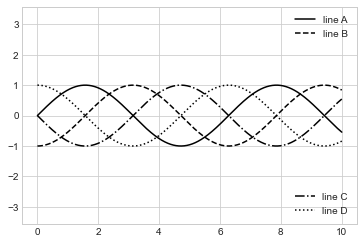

In [ ]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')

# Specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'], loc='upper right')

# Create the second legend and add the artist manually
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'], loc='lower right')
ax.add_artist(leg);

This is a peek into the low-level artist objects that comprise any Matplotlib plot.
If you examine the source code of `ax.legend` (recall that you can do this with within the Jupyter notebook using `ax.legend??`) you'll see that the function simply consists of some logic to create a suitable `Legend` artist, which is then saved in the `legend_` attribute and added to the figure when the plot is drawn.

# Customizing Colorbars

Plot legends identify discrete labels of discrete points.
For continuous labels based on the color of points, lines, or regions, a labeled colorbar can be a great tool.
In Matplotlib, a colorbar is drawn as a separate axes that can provide a key for the meaning of colors in a plot.
Because the book is printed in black and white, this chapter has an accompanying [online supplement](https://github.com/jakevdp/PythonDataScienceHandbook) where you can view the figures in full color.
We'll start by setting up the notebook for plotting and importing the functions we will use:

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [ ]:
%matplotlib inline
import numpy as np

As we have seen several times already, the simplest colorbar can be created with the `plt.colorbar` function (see the following figure):

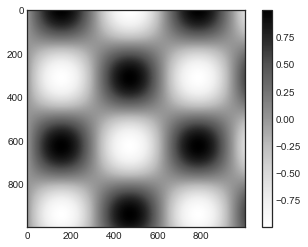

In [ ]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();

We'll now discuss a few ideas for customizing these colorbars and using them effectively in various situations.

## Customizing Colorbars

The colormap can be specified using the `cmap` argument to the plotting function that is creating the visualization (see the following figure):

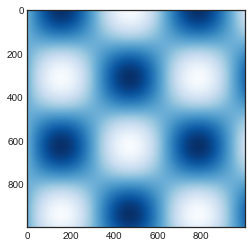

In [ ]:
plt.imshow(I, cmap='Blues');

The names of available colormaps are in the `plt.cm` namespace; using IPython's tab completion feature will give you a full list of built-in possibilities:

```
plt.cm.<TAB>
```
But being *able* to choose a colormap is just the first step: more important is how to *decide* among the possibilities!
The choice turns out to be much more subtle than you might initially expect.

### Choosing the Colormap

A full treatment of color choice within visualizations is beyond the scope of this book, but for entertaining reading on this subject and others, see the article ["Ten Simple Rules for Better Figures"](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833) by Nicholas Rougier, Michael Droettboom, and Philip Bourne.
Matplotlib's online documentation also has an [interesting discussion](https://matplotlib.org/stable/tutorials/colors/colormaps.html) of colormap choice.

Broadly, you should be aware of three different categories of colormaps:

- *Sequential colormaps*: These are made up of one continuous sequence of colors (e.g., `binary` or `viridis`).
- *Divergent colormaps*: These usually contain two distinct colors, which show positive and negative deviations from a mean (e.g., `RdBu` or `PuOr`).
- *Qualitative colormaps*: These mix colors with no particular sequence (e.g., `rainbow` or `jet`).

The `jet` colormap, which was the default in Matplotlib prior to version 2.0, is an example of a qualitative colormap.
Its status as the default was quite unfortunate, because qualitative maps are often a poor choice for representing quantitative data.
Among the problems is the fact that qualitative maps usually do not display any uniform progression in brightness as the scale increases.

We can see this by converting the `jet` colorbar into black and white (see the following figure):

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))

    # Convert RGBA to perceived grayscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]

    return LinearSegmentedColormap.from_list(
        cmap.name + "_gray", colors, cmap.N)


def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))

    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))

    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

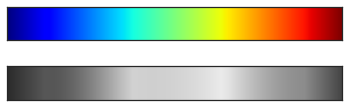

In [ ]:
view_colormap('jet')

Notice the bright stripes in the grayscale image.
Even in full color, this uneven brightness means that the eye will be drawn to certain portions of the color range, which will potentially emphasize unimportant parts of the dataset.
It's better to use a colormap such as `viridis` (the default as of Matplotlib 2.0), which is specifically constructed to have an even brightness variation across the range; thus, it not only plays well with our color perception, but also will translate well to grayscale printing (see the following figure):

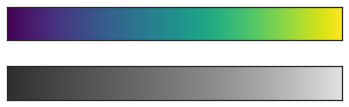

In [ ]:
view_colormap('viridis')

For other situations, such as showing positive and negative deviations from some mean, dual-color colorbars such as `RdBu` (*Red–Blue*) are helpful. However, as you can see in the following figure, it's important to note that the positive/negative information will be lost upon translation to grayscale!

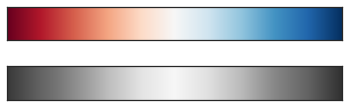

In [ ]:
view_colormap('RdBu')

We'll see examples of using some of these colormaps as we continue.

There are a large number of colormaps available in Matplotlib; to see a list of them, you can use IPython to explore the `plt.cm` submodule. For a more principled approach to colors in Python, you can refer to the tools and documentation within the Seaborn library (see [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)).

### Color Limits and Extensions

Matplotlib allows for a large range of colorbar customization.
The colorbar itself is simply an instance of `plt.Axes`, so all of the axes and tick formatting tricks we've seen so far are applicable.
The colorbar has some interesting flexibility: for example, we can narrow the color limits and indicate the out-of-bounds values with a triangular arrow at the top and bottom by setting the `extend` property.
This might come in handy, for example, if displaying an image that is subject to noise (see the following figure):

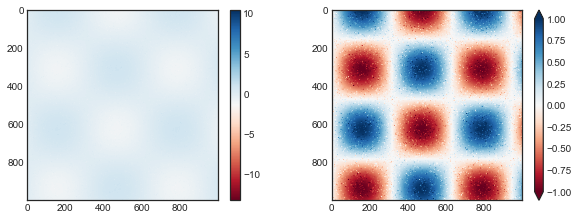

In [ ]:
# make noise in 1% of the image pixels
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1)

Notice that in the left panel, the default color limits respond to the noisy pixels, and the range of the noise completely washes out the pattern we are interested in.
In the right panel, we manually set the color limits and add extensions to indicate values that are above or below those limits.
The result is a much more useful visualization of our data.

### Discrete Colorbars

Colormaps are by default continuous, but sometimes you'd like to represent discrete values.
The easiest way to do this is to use the `plt.cm.get_cmap` function and pass the name of a suitable colormap along with the number of desired bins (see the following figure):

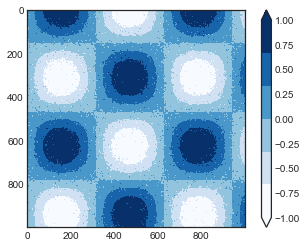

In [ ]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar(extend='both')
plt.clim(-1, 1);

The discrete version of a colormap can be used just like any other colormap.

## Example: Handwritten Digits

As an example of where this can be applied, let's look at an interesting visualization of some handwritten digits from the digits dataset, included in Scikit-Learn; it consists of nearly 2,000 $8 \times 8$ thumbnails showing various handwritten digits.

For now, let's start by downloading the digits dataset and visualizing several of the example images with `plt.imshow` (see the following figure):

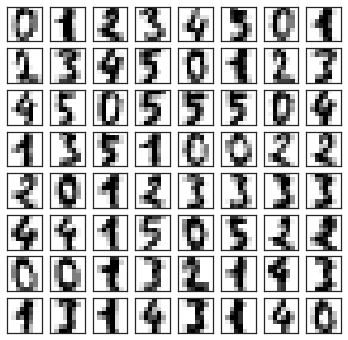

In [ ]:
# load images of the digits 0 through 5 and visualize several of them
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

Because each digit is defined by the hue of its 64 pixels, we can consider each digit to be a point lying in 64-dimensional space: each dimension represents the brightness of one pixel.
Visualizing such high-dimensional data can be difficult, but one way to approach this task is to use a *dimensionality reduction* technique such as manifold learning to reduce the dimensionality of the data while maintaining the relationships of interest.
Dimensionality reduction is an example of unsupervised machine learning, and we will discuss it in more detail in [What Is Machine Learning?](05.01-What-Is-Machine-Learning.ipynb).

Deferring the discussion of these details, let's take a look at a two-dimensional manifold learning projection of the digits data (see [In-Depth: Manifold Learning](05.10-Manifold-Learning.ipynb) for details):

In [ ]:
# project the digits into 2 dimensions using Isomap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2, n_neighbors=15)
projection = iso.fit_transform(digits.data)

We'll use our discrete colormap to view the results, setting the `ticks` and `clim` to improve the aesthetics of the resulting colorbar (see the following figure):

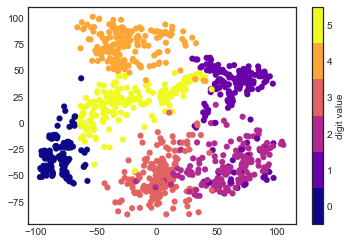

In [ ]:
# plot the results
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
            c=digits.target, cmap=plt.cm.get_cmap('plasma', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

The projection also gives us some insights on the relationships within the dataset: for example, the ranges of 2 and 3 nearly overlap in this projection, indicating that some handwritten 2s and 3s are difficult to distinguish, and may be more likely to be confused by an automated classification algorithm.
Other values, like 0 and 1, are more distantly separated, and may be less likely to be confused.

We'll return to manifold learning and digit classification in [Part 5](05.00-Machine-Learning.ipynb).

# Multiple Subplots

Sometimes it is helpful to compare different views of data side by side.
To this end, Matplotlib has the concept of *subplots*: groups of smaller axes that can exist together within a single figure.
These subplots might be insets, grids of plots, or other more complicated layouts.
In this chapter we'll explore four routines for creating subplots in Matplotlib. We'll start by importing the packages we will use:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

## plt.axes: Subplots by Hand

The most basic method of creating an axes is to use the `plt.axes` function.
As we've seen previously, by default this creates a standard axes object that fills the entire figure.
`plt.axes` also takes an optional argument that is a list of four numbers in the figure coordinate system (`[left, bottom, width, height]`), which ranges from 0 at the bottom left of the figure to 1 at the top right of the figure.

For example, we might create an inset axes at the top-right corner of another axes by setting the *x* and *y* position to 0.65 (that is, starting at 65% of the width and 65% of the height of the figure) and the *x* and *y* extents to 0.2 (that is, the size of the axes is 20% of the width and 20% of the height of the figure). The following figure shows the result:

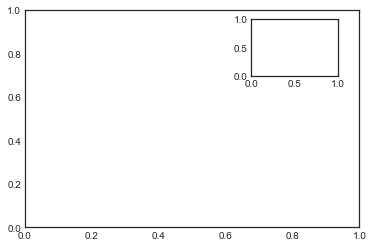

In [ ]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

The equivalent of this command within the object-oriented interface is `fig.add_axes`. Let's use this to create two vertically stacked axes, as seen in the following figure:

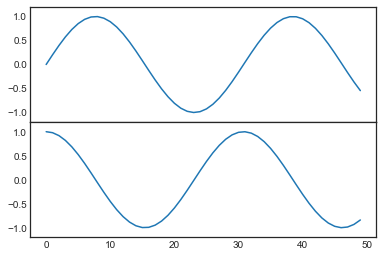

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

We now have two axes (the top with no tick labels) that are just touching: the bottom of the upper panel (at position 0.5) matches the top of the lower panel (at position 0.1 + 0.4).

## plt.subplot: Simple Grids of Subplots

Aligned columns or rows of subplots are a common enough need that Matplotlib has several convenience routines that make them easy to create.
The lowest level of these is `plt.subplot`, which creates a single subplot within a grid.
As you can see, this command takes three integer arguments—the number of rows, the number of columns, and the index of the plot to be created in this scheme, which runs from the upper left to the bottom right (see the following figure):

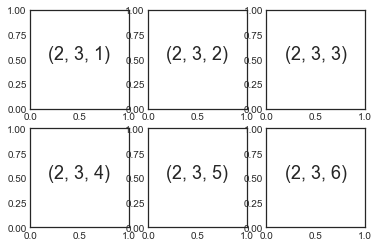

In [ ]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

The command `plt.subplots_adjust` can be used to adjust the spacing between these plots.
The following code uses the equivalent object-oriented command, `fig.add_subplot`; the following figure shows the result:

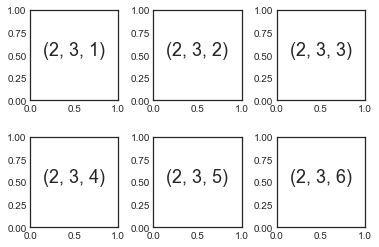

In [ ]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

Here we've used the `hspace` and `wspace` arguments of `plt.subplots_adjust`, which specify the spacing along the height and width of the figure, in units of the subplot size (in this case, the space is 40% of the subplot width and height).

## plt.subplots: The Whole Grid in One Go

The approach just described quickly becomes tedious when creating a large grid of subplots, especially if you'd like to hide the x- and y-axis labels on the inner plots.
For this purpose, `plt.subplots` is the easier tool to use (note the `s` at the end of `subplots`). Rather than creating a single subplot, this function creates a full grid of subplots in a single line, returning them in a NumPy array.
The arguments are the number of rows and number of columns, along with optional keywords `sharex` and `sharey`, which allow you to specify the relationships between different axes.

Let's create a $2 \times 3$ grid of subplots, where all axes in the same row share their y-axis scale, and all axes in the same column share their x-axis scale (see the following figure):

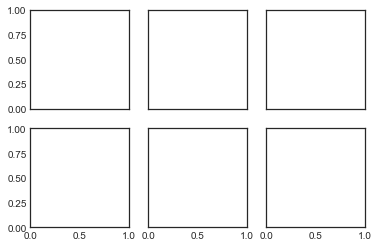

In [ ]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

By specifying `sharex` and `sharey`, we've automatically removed inner labels on the grid to make the plot cleaner.
The resulting grid of axes instances is returned within a NumPy array, allowing for convenient specification of the desired axes using standard array indexing notation (see the following figure):

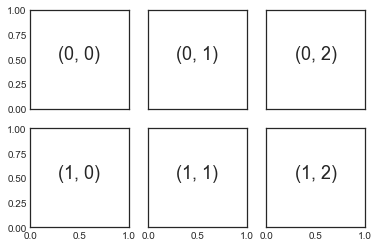

In [ ]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

In comparison to `plt.subplot`, `plt.subplots` is more consistent with Python's conventional zero-based indexing, whereas `plt.subplot` uses MATLAB-style one-based indexing.

## plt.GridSpec: More Complicated Arrangements

To go beyond a regular grid to subplots that span multiple rows and columns, `plt.GridSpec` is the best tool.
`plt.GridSpec` does not create a plot by itself; it is rather a convenient interface that is recognized by the `plt.subplot` command.
For example, a `GridSpec` for a grid of two rows and three columns with some specified width and height space looks like this:

In [ ]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

From this we can specify subplot locations and extents using the familiar Python slicing syntax (see the following figure):

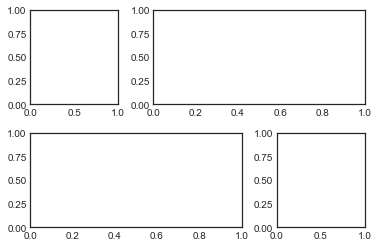

In [ ]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

This type of flexible grid alignment has a wide range of uses.
I most often use it when creating multiaxes histogram plots like the ones shown in the following figure:

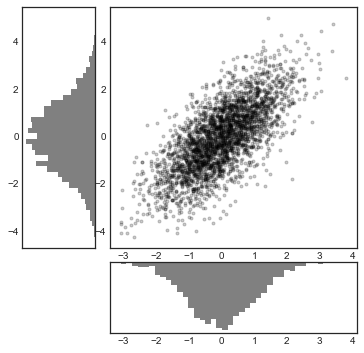

In [ ]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
rng = np.random.default_rng(1701)
x, y = rng.multivariate_normal(mean, cov, 3000).T

# Set up the axes with GridSpec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# Scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# Histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

This type of distribution plotted alongside its margins is common enough that it has its own plotting API in the Seaborn package; see [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb) for more details.